# **Preprocessing**

**Installation:**

In [ ]:
!pip install bangla-stemmer
!pip install bnlp_toolkit

     |████████████████████████████████| 23.9 MB 1.6 MB/s 
     |████████████████████████████████| 1.2 MB 39.0 MB/s 
     |████████████████████████████████| 743 kB 44.3 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

**Import and Initialization**


In [ ]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt 
from bnlp import NLTKTokenizer
from bnlp import BasicTokenizer
from bangla_stemmer.stemmer.stemmer import BanglaStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import  MultinomialNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


**Load the dataset**

In [ ]:
!gdown --id 1ATe3s9_tbJog00c_8xBvpQbZ_Q04szIS #download the dataset
!gdown --id 1rgoshfz_7xuS3HwE2vM-F-G0TI_O5kgg #download stopwords

Downloading...
From: https://drive.google.com/uc?id=1ATe3s9_tbJog00c_8xBvpQbZ_Q04szIS
To: /content/lyrics_dataset.csv
100% 2.04M/2.04M [00:00<00:00, 132MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rgoshfz_7xuS3HwE2vM-F-G0TI_O5kgg
To: /content/StopWords.txt
100% 5.21k/5.21k [00:00<00:00, 7.02MB/s]


In [ ]:
#StopWords
StopWords = open('/content/StopWords.txt',"r",encoding='utf-8').read().split('\n')
print(StopWords)

['অবশ্য', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অথবা', 'অথচ', 'অর্থাত', 'অন্য', 'আজ', 'আছে', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আরও', 'আর', 'আগে', 'আগেই', 'আই', 'অতএব', 'আগামী', 'অবধি', 'অনুযায়ী', 'আদ্যভাগে', 'এই', 'একই', 'একে', 'একটি', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটি', 'এটা', 'এটাই', 'এতটাই', 'এবং', 'একবার', 'এবার', 'এদের', 'এঁদের', 'এমন', 'এমনকী', 'এল', 'এর', 'এরা', 'এঁরা', 'এস', 'এত', 'এতে', 'এসে', 'একে', 'এ', 'ঐ', ' ই', 'ইহা', 'ইত্যাদি', 'উনি', 'উপর', 'উপরে', 'উচিত', 'ও', 'ওই', 'ওর', 'ওরা', 'ওঁর', 'ওঁরা', 'ওকে', 'ওদের', 'ওঁদের', 'ওখানে', 'কত', 'কবে', 'করতে', 'কয়েক', 'কয়েকটি', 'করবে', 'করলেন', 'করার', 'কারও', 'করা', 'করি', 'করিয়ে', 'করার', 'করাই', 'করলে', 'করলেন', 'করিতে', 'করিয়া', 'করেছিলেন', 'করছে', 'করছেন', 'করেছেন', 'করেছে', 'করেন', 'করবেন', 'করায়', 'করে', 'করেই', 'কাছ', 'কাছে', 'কাজে', 'কারণ', 'কিছু', 'কিছুই', 'কিন্তু', 'কিংবা', 'কি', 'কী', 'কেউ', 'কেউই', 'কাউকে', 'কেন', 'কে', 'কোনও', 'কোনো', 'কোন', 'কখনও', 'ক্ষেত্রে', 'খুব\tগুলি', 'গিয়ে',

In [ ]:
data = pd.read_csv ('/content/lyrics_dataset.csv',encoding='utf-8')
data



,lyrics,label
0,"জনস্রোত By Warfaze\nসবাই বলে, আর তুমিও বলো\nআর...",0
1,প্রজন্ম-২০১২ By Warfaze\nনা শুনি তোমার কানে\nন...,0
2,"পূর্ণতা By Warfaze\nসেদিন ভোরে, বুকের গভীরে\nশ...",1
3,"রূপকথা By Warfaze\nশক্তি দাও বিধাতা, অনন্তকাল ...",1
4,না By Warfaze\nআর চার দেয়ালে কেন একা ডূবে থাক...,0
...,...,...
995,আগুন – অসুর\nএকমুঠো ছাই উড়লো কোথায়\nপুড়ছে ক...,0
996,শুধু তোমার স্মৃতিটুকু মনে রয়ে যায় - Liza\nঅন...,1
997,ক্ষমা করো আমি ভালো নেই – অনুপম রায়\nক্ষমা করো ...,1
998,তোমায় মনে পড়ছিল – রূপঙ্কর বাগচী\nকাল রাতে ঠি...,1


Total number of lyrics: 1000
0    567
1    433
Name: label, dtype: int64


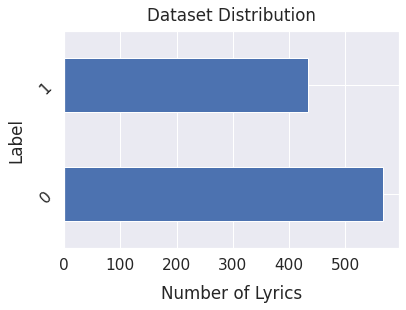

In [ ]:
print(f'Total number of lyrics: {len(data)}')
sns.set(font_scale=1.4)
data['label'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of Lyrics", labelpad=12)
plt.ylabel("Label", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);
print(data['label'].value_counts())

**Clean the Dataset**

In [ ]:
# Cleaning Data [Remove unncessary symbols]
def cleaning_data(row):
      row = row[row.find('\n'):]
      lyrics = re.sub('[^\u0980-\u09FF]',' ',str(row)) #removing unnecessary punctuation
      return lyrics
# Apply the function into the dataframe
data['cleaned'] = data['lyrics'].apply(cleaning_data)  

def remove_stopwords(lyrics):
  ans = ""
  for item in lyrics.split():
    if item in StopWords or item=="":
      continue
      #ans+= BanglaStemmer().stem(item)+" "
    ans+= item+" "
  return ans.lstrip()

# Apply the function into the dataframe to remove stopwords
data['cleaned_stopwords'] = data['cleaned'].apply(remove_stopwords) 


def stemming(lyrics):
  ans = ""
  for item in lyrics.split():
      ans+= BanglaStemmer().stem(item)+" "
  return ans.lstrip()

# Apply the function into the dataframe to stem the words
data['cleaned_stem'] = data['cleaned'].apply(stemming) 



# print some cleaned reviews from the dataset
sample_data = [0,20,50,100,200,300,350,400,450,500,600,650,700,750,800,999]
for i in sample_data:
  print('Original: ',data.lyrics[i],'\nCleaned:',
           data.cleaned[i],'\n','Label:--> ',data.label[i],'\n')

lyrics_dataset = data


Streaming output truncated to the last 5000 lines.
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..


In [ ]:
data

,lyrics,label,cleaned,cleaned_stopwords,cleaned_stem
0,"জনস্রোত By Warfaze\nসবাই বলে, আর তুমিও বলো\nআর...",0,সবাই বলে আর তুমিও বলো আর তুমি কি বলো আর তুম...,সবাই তুমিও বলো বলো বলো বলো পথ জনস্রোত অবরোধ পথ...,সবা বলে আর তুমি বলো আর তুমি কি বলো আর তুমি কি ...
1,প্রজন্ম-২০১২ By Warfaze\nনা শুনি তোমার কানে\nন...,0,না শুনি তোমার কানে না তাকাই তোমার পানে না দেখ...,শুনি কানে তাকাই পানে দেখি চোখে চোখ রাঙিয়ে তাক...,না শুনি তোম কানে না তাকা তোম পানে না দেখি তোম ...
2,"পূর্ণতা By Warfaze\nসেদিন ভোরে, বুকের গভীরে\nশ...",1,সেদিন ভোরে বুকের গভীরে শুনেছি জমে থাকা নীল ব...,সেদিন ভোরে বুকের গভীরে শুনেছি জমে নীল বেদনার ড...,সেদিন ভোরে বুক গভীরে শুনে জমে থাকা নীল বেদন ডা...
3,"রূপকথা By Warfaze\nশক্তি দাও বিধাতা, অনন্তকাল ...",1,শক্তি দাও বিধাতা অনন্তকাল ধরে জ্বলছে হৃদয় হ...,শক্তি দাও বিধাতা অনন্তকাল জ্বলছে হৃদয় হয়তো ব...,শক্তি দাও বিধাতা অনন্তকাল ধরে জ্বল হৃদয় হয় ক...
4,না By Warfaze\nআর চার দেয়ালে কেন একা ডূবে থাক...,0,আর চার দেয়ালে কেন একা ডূবে থাকা এই বর্তমানকে...,চার দেয়ালে একা ডূবে বর্তমানকে দূরে ঠেলে অতীতে...,আর চার দেয়ালে কেন একা ডূবে থাকা এই বর্তমান দূ...
...,...,...,...,...,...
995,আগুন – অসুর\nএকমুঠো ছাই উড়লো কোথায়\nপুড়ছে ক...,0,একমুঠো ছাই উড়লো কোথায় পুড়ছে কে আজ বলে দে আ...,একমুঠো ছাই উড়লো কোথায় পুড়ছে দে আমায় আগুন ম...,একমুঠো ছাই উড়লো কোথায় পুড় কে আজ বলে দে আমায...
996,শুধু তোমার স্মৃতিটুকু মনে রয়ে যায় - Liza\nঅন...,1,অনেক কিছুই অনেক ভাবে আড়াল হয়ে যায় শুধু তো...,আড়াল হয়ে যায় স্মৃতিটুকু মনে রয়ে যায় স্মৃত...,অনেক কিছু অনেক ভাবে আড়াল হয়ে যায় শুধু তোম স...
997,ক্ষমা করো আমি ভালো নেই – অনুপম রায়\nক্ষমা করো ...,1,ক্ষমা করো আমি ভালো নেই এলোমেলো হয়ে গেছি যেন ...,ক্ষমা করো ভালো এলোমেলো গেছি হারিয়েছি হে বসন্ত ...,ক্ষমা করো আমি ভালো নেই এলোমেলো হয় গেছি যেন সব ...
998,তোমায় মনে পড়ছিল – রূপঙ্কর বাগচী\nকাল রাতে ঠি...,1,কাল রাতে ঠিক মাঝ রাতে ঠিক তোমায় মনে পড়ছিল...,কাল রাতে মাঝ রাতে তোমায় মনে পড়ছিল দূরে গ্রাম...,কাল রাত ঠিক মাঝ রাত ঠিক তোমায় মনে পড়ছিল দূরে...


# **Model 1**
CountVectorizer, TfidfTransformer, 
No Stopword Remove and No Stemming

**Train Test Split**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(lyrics_dataset.cleaned,lyrics_dataset.label,train_size = 0.7,test_size = 0.3,random_state =0)

print(color.BOLD+"\nDataset Distribution:\n"+color.END)
print("\tSet Name","\t\tSize")
print("\t========\t\t======")

print("\tFull\t\t\t",len(lyrics_dataset),
"\n\tTraining\t\t",len(X_train),
"\n\tTest\t\t\t",len(X_test))


Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1000 
	Training		 700 
	Test			 300


[[154  20]
 [ 77  49]]


              precision    recall  f1-score   support

           0       0.67      0.89      0.76       174
           1       0.71      0.39      0.50       126

    accuracy                           0.68       300
   macro avg       0.69      0.64      0.63       300
weighted avg       0.68      0.68      0.65       300



Accuracy: 0.676667


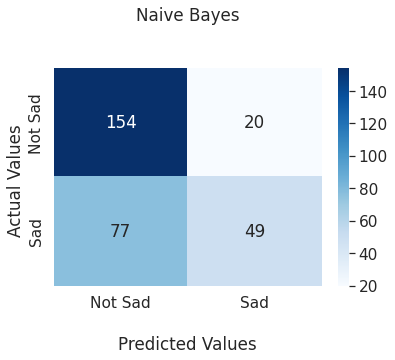

In [ ]:
# Extracting features from text files
# Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
# The names ‘vect’ , ‘tfidf’ and ‘clf’ are arbitrary but will be used later.
# We will be using the 'text_clf' going forward.
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

text_clf = text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

nb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % nb_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Naive Bayes\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()


[[145  29]
 [ 82  44]]


              precision    recall  f1-score   support

           0       0.64      0.83      0.72       174
           1       0.60      0.35      0.44       126

    accuracy                           0.63       300
   macro avg       0.62      0.59      0.58       300
weighted avg       0.62      0.63      0.61       300



Accuracy: 0.630000


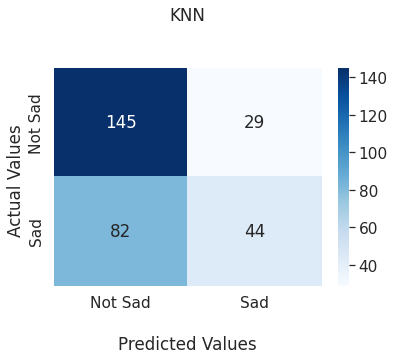

In [ ]:
# Training KNN and calculating its performance
from sklearn.neighbors import KNeighborsClassifier

text_clf_knn = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-knn', KNeighborsClassifier(n_neighbors=2))])

text_clf_knn = text_clf_knn.fit(X_train, y_train)
y_pred = text_clf_knn.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

knn_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % knn_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('KNN\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


[[129  45]
 [ 48  78]]


              precision    recall  f1-score   support

           0       0.73      0.74      0.74       174
           1       0.63      0.62      0.63       126

    accuracy                           0.69       300
   macro avg       0.68      0.68      0.68       300
weighted avg       0.69      0.69      0.69       300



[[129  45]
 [ 48  78]]


              precision    recall  f1-score   support

           0       0.73      0.74      0.74       174
           1       0.63      0.62      0.63       126

    accuracy                           0.69       300
   macro avg       0.68      0.68      0.68       300
weighted avg       0.69      0.69      0.69       300



Accuracy: 0.690000


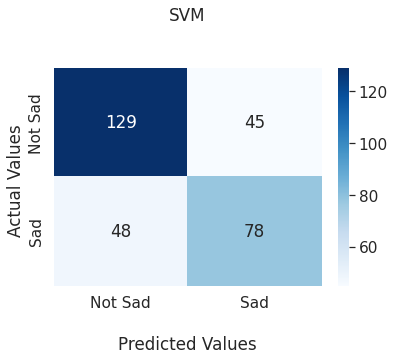

In [ ]:
# Training Support Vector Machines - SVM and calculating its performance

from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=5, random_state=42))])

text_clf_svm = text_clf_svm.fit(X_train, y_train)
y_pred = text_clf_svm.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

svm_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % svm_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('SVM\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()




[[140  34]
 [ 70  56]]


              precision    recall  f1-score   support

           0       0.67      0.80      0.73       174
           1       0.62      0.44      0.52       126

    accuracy                           0.65       300
   macro avg       0.64      0.62      0.62       300
weighted avg       0.65      0.65      0.64       300



Accuracy: 0.653333


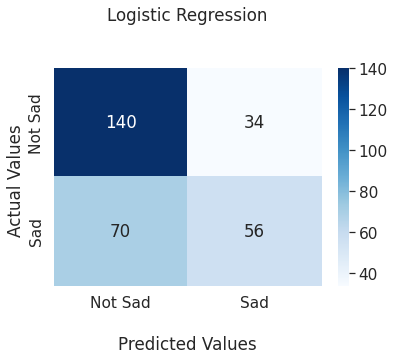

In [ ]:
# Training Logistic Regression and calculating its performance

text_clf_lr = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-lr', LogisticRegression(solver='lbfgs', max_iter=1000))])

text_clf_lr = text_clf_lr.fit(X_train, y_train)
y_pred = text_clf_lr.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

lr_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % lr_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Logistic Regression\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



[[127  47]
 [ 60  66]]


              precision    recall  f1-score   support

           0       0.68      0.73      0.70       174
           1       0.58      0.52      0.55       126

    accuracy                           0.64       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.64      0.64      0.64       300



Accuracy: 0.643333


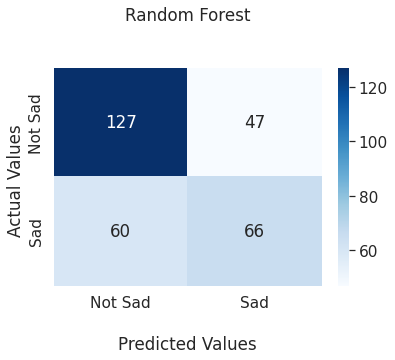

In [ ]:
# Training Random Forest and calculating its performance

text_clf_rf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-rm', RandomForestClassifier(n_estimators=10,criterion = 'entropy', random_state=0))])

text_clf_rf = text_clf_rf.fit(X_train, y_train)
y_pred = text_clf_rf.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

rf_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % rf_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()




[[125  49]
 [ 63  63]]


              precision    recall  f1-score   support

           0       0.66      0.72      0.69       174
           1       0.56      0.50      0.53       126

    accuracy                           0.63       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.62      0.63      0.62       300



Accuracy: 0.626667


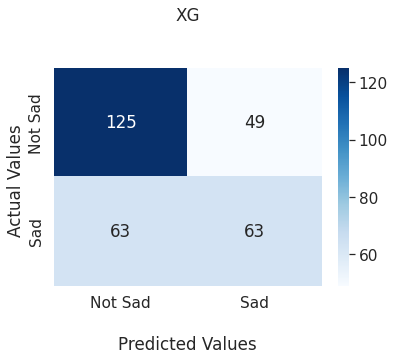

In [ ]:
# Training XGBoost and calculating its performance

text_clf_xgb = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-xgb', XGBClassifier())])

text_clf_xgb = text_clf_xgb.fit(X_train, y_train)
y_pred = text_clf_xgb.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

xgb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % xgb_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('XG\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



[[90 84]
 [59 67]]


              precision    recall  f1-score   support

           0       0.60      0.52      0.56       174
           1       0.44      0.53      0.48       126

    accuracy                           0.52       300
   macro avg       0.52      0.52      0.52       300
weighted avg       0.54      0.52      0.53       300



Accuracy: 0.523333


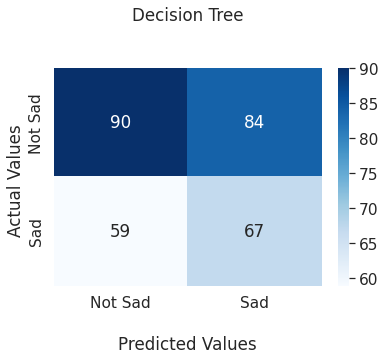

In [ ]:
# Training Decision Tree Classifier and calculating its performance

text_clf_dt = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-dt', DecisionTreeClassifier(criterion = 'entropy', random_state = 0))])

text_clf_dt = text_clf_dt.fit(X_train, y_train)
y_pred = text_clf_dt.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

dt_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % dt_accuracy)



ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



# **Model 2**
CountVectorizer, TfidfTransformer, 
Stopword Removing

**Train Test Split**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(lyrics_dataset.cleaned_stopwords,lyrics_dataset.label,train_size = 0.7,test_size = 0.3,random_state =0)

print(color.BOLD+"\nDataset Distribution:\n"+color.END)
print("\tSet Name","\t\tSize")
print("\t========\t\t======")

print("\tFull\t\t\t",len(lyrics_dataset),
"\n\tTraining\t\t",len(X_train),
"\n\tTest\t\t\t",len(X_test))


Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1000 
	Training		 700 
	Test			 300


[[151  23]
 [ 65  61]]


              precision    recall  f1-score   support

           0       0.70      0.87      0.77       174
           1       0.73      0.48      0.58       126

    accuracy                           0.71       300
   macro avg       0.71      0.68      0.68       300
weighted avg       0.71      0.71      0.69       300



Accuracy: 0.706667


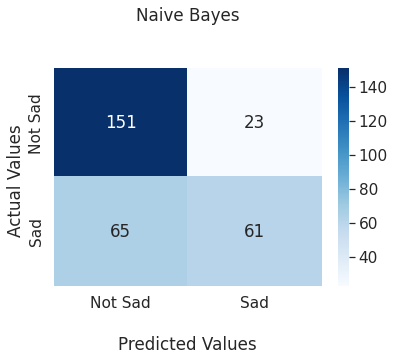

In [ ]:
# Extracting features from text files
# Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
# The names ‘vect’ , ‘tfidf’ and ‘clf’ are arbitrary but will be used later.
# We will be using the 'text_clf' going forward.
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

text_clf = text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

nb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % nb_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Naive Bayes\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()


[[137  37]
 [ 81  45]]


              precision    recall  f1-score   support

           0       0.63      0.79      0.70       174
           1       0.55      0.36      0.43       126

    accuracy                           0.61       300
   macro avg       0.59      0.57      0.57       300
weighted avg       0.59      0.61      0.59       300



Accuracy: 0.606667


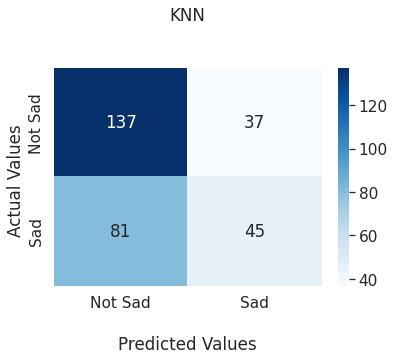

In [ ]:
# Training KNN and calculating its performance
from sklearn.neighbors import KNeighborsClassifier

text_clf_knn = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-knn', KNeighborsClassifier(n_neighbors=2))])

text_clf_knn = text_clf_knn.fit(X_train, y_train)
y_pred = text_clf_knn.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

knn_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % knn_accuracy)



ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('KNN\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


[[138  36]
 [ 48  78]]


              precision    recall  f1-score   support

           0       0.74      0.79      0.77       174
           1       0.68      0.62      0.65       126

    accuracy                           0.72       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.72      0.72      0.72       300



[[138  36]
 [ 48  78]]


              precision    recall  f1-score   support

           0       0.74      0.79      0.77       174
           1       0.68      0.62      0.65       126

    accuracy                           0.72       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.72      0.72      0.72       300



Accuracy: 0.720000


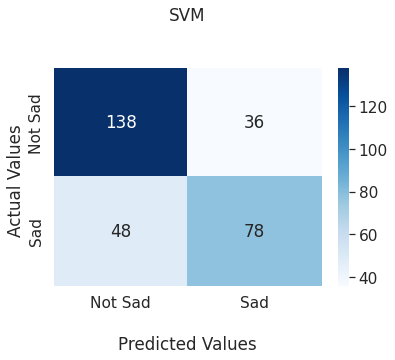

In [ ]:
# Training Support Vector Machines - SVM and calculating its performance

from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=5, random_state=42))])

text_clf_svm = text_clf_svm.fit(X_train, y_train)
y_pred = text_clf_svm.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

svm_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % svm_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('SVM\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()




[[144  30]
 [ 54  72]]


              precision    recall  f1-score   support

           0       0.73      0.83      0.77       174
           1       0.71      0.57      0.63       126

    accuracy                           0.72       300
   macro avg       0.72      0.70      0.70       300
weighted avg       0.72      0.72      0.71       300



Accuracy: 0.720000


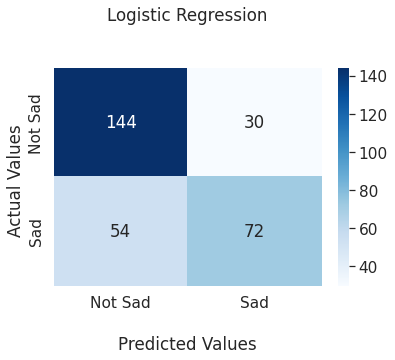

In [ ]:
# Training Logistic Regression and calculating its performance

text_clf_lr = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-lr', LogisticRegression(solver='lbfgs', max_iter=1000))])

text_clf_lr = text_clf_lr.fit(X_train, y_train)
y_pred = text_clf_lr.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

lr_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % lr_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Logistic Regression\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



[[136  38]
 [ 77  49]]


              precision    recall  f1-score   support

           0       0.64      0.78      0.70       174
           1       0.56      0.39      0.46       126

    accuracy                           0.62       300
   macro avg       0.60      0.59      0.58       300
weighted avg       0.61      0.62      0.60       300



Accuracy: 0.616667


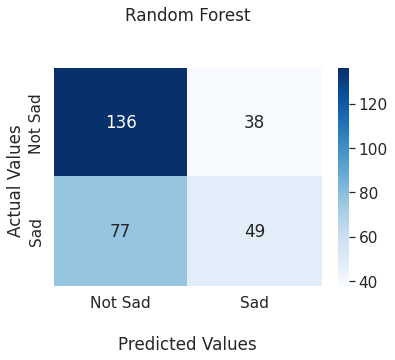

In [ ]:
# Training Random Forest and calculating its performance

text_clf_rf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-rm', RandomForestClassifier(n_estimators=10,criterion = 'entropy', random_state=0))])

text_clf_rf = text_clf_rf.fit(X_train, y_train)
y_pred = text_clf_rf.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

rf_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % rf_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()




[[130  44]
 [ 70  56]]


              precision    recall  f1-score   support

           0       0.65      0.75      0.70       174
           1       0.56      0.44      0.50       126

    accuracy                           0.62       300
   macro avg       0.60      0.60      0.60       300
weighted avg       0.61      0.62      0.61       300



Accuracy: 0.620000


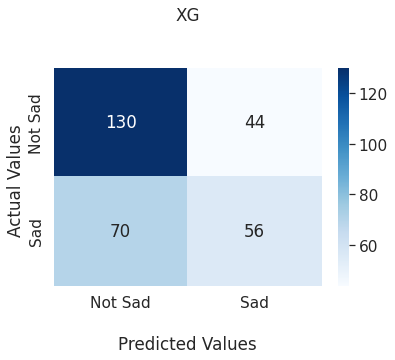

In [ ]:
# Training XGBoost and calculating its performance

text_clf_xgb = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-xgb', XGBClassifier())])

text_clf_xgb = text_clf_xgb.fit(X_train, y_train)
y_pred = text_clf_xgb.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

xgb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % xgb_accuracy)



ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('XG\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



[[108  66]
 [ 56  70]]


              precision    recall  f1-score   support

           0       0.66      0.62      0.64       174
           1       0.51      0.56      0.53       126

    accuracy                           0.59       300
   macro avg       0.59      0.59      0.59       300
weighted avg       0.60      0.59      0.60       300



Accuracy: 0.593333


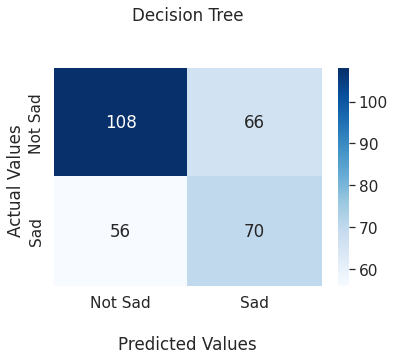

In [ ]:
# Training Decision Tree Classifier and calculating its performance

text_clf_dt = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-xgb', DecisionTreeClassifier(criterion = 'entropy', random_state = 0))])

text_clf_dt = text_clf_dt.fit(X_train, y_train)
y_pred = text_clf_dt.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

dt_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % dt_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



# **Model 3**
CountVectorizer, TfidfTransformer, 
With Stemming

**Train Test Split**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(lyrics_dataset.cleaned_stem,lyrics_dataset.label,train_size = 0.7,test_size = 0.3,random_state =0)

print(color.BOLD+"\nDataset Distribution:\n"+color.END)
print("\tSet Name","\t\tSize")
print("\t========\t\t======")

print("\tFull\t\t\t",len(lyrics_dataset),
"\n\tTraining\t\t",len(X_train),
"\n\tTest\t\t\t",len(X_test))


Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1000 
	Training		 700 
	Test			 300


[[150  24]
 [ 74  52]]


              precision    recall  f1-score   support

           0       0.67      0.86      0.75       174
           1       0.68      0.41      0.51       126

    accuracy                           0.67       300
   macro avg       0.68      0.64      0.63       300
weighted avg       0.68      0.67      0.65       300



Accuracy: 0.673333


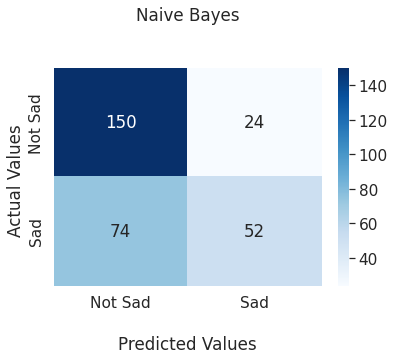

In [ ]:
# Extracting features from text files
# Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
# The names ‘vect’ , ‘tfidf’ and ‘clf’ are arbitrary but will be used later.
# We will be using the 'text_clf' going forward.
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

text_clf = text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

nb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % nb_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Naive Bayes\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()


[[140  34]
 [ 79  47]]


              precision    recall  f1-score   support

           0       0.64      0.80      0.71       174
           1       0.58      0.37      0.45       126

    accuracy                           0.62       300
   macro avg       0.61      0.59      0.58       300
weighted avg       0.61      0.62      0.60       300



Accuracy: 0.623333


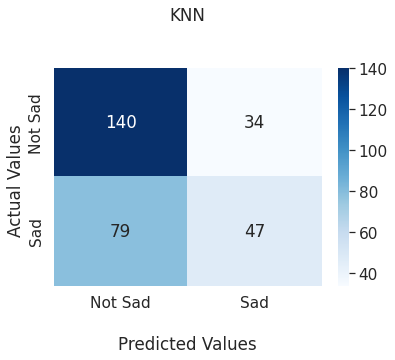

In [ ]:
# Training KNN and calculating its performance
from sklearn.neighbors import KNeighborsClassifier

text_clf_knn = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-knn', KNeighborsClassifier(n_neighbors=2))])

text_clf_knn = text_clf_knn.fit(X_train, y_train)
y_pred = text_clf_knn.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

knn_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % knn_accuracy)



ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('KNN\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


[[124  50]
 [ 53  73]]


              precision    recall  f1-score   support

           0       0.70      0.71      0.71       174
           1       0.59      0.58      0.59       126

    accuracy                           0.66       300
   macro avg       0.65      0.65      0.65       300
weighted avg       0.66      0.66      0.66       300



[[124  50]
 [ 53  73]]


              precision    recall  f1-score   support

           0       0.70      0.71      0.71       174
           1       0.59      0.58      0.59       126

    accuracy                           0.66       300
   macro avg       0.65      0.65      0.65       300
weighted avg       0.66      0.66      0.66       300



Accuracy: 0.656667


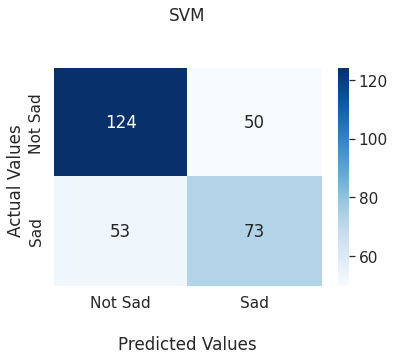

In [ ]:
# Training Support Vector Machines - SVM and calculating its performance

from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=5, random_state=42))])

text_clf_svm = text_clf_svm.fit(X_train, y_train)
y_pred = text_clf_svm.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

svm_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % svm_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('SVM\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()




[[143  31]
 [ 64  62]]


              precision    recall  f1-score   support

           0       0.69      0.82      0.75       174
           1       0.67      0.49      0.57       126

    accuracy                           0.68       300
   macro avg       0.68      0.66      0.66       300
weighted avg       0.68      0.68      0.67       300



Accuracy: 0.683333


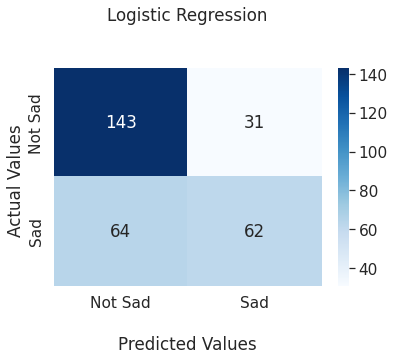

In [ ]:
# Training Logistic Regression and calculating its performance

text_clf_lr = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-lr', LogisticRegression(solver='lbfgs', max_iter=1000))])

text_clf_lr = text_clf_lr.fit(X_train, y_train)
y_pred = text_clf_lr.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

lr_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % lr_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Logistic Regression\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



[[127  47]
 [ 77  49]]


              precision    recall  f1-score   support

           0       0.62      0.73      0.67       174
           1       0.51      0.39      0.44       126

    accuracy                           0.59       300
   macro avg       0.57      0.56      0.56       300
weighted avg       0.58      0.59      0.58       300



Accuracy: 0.586667


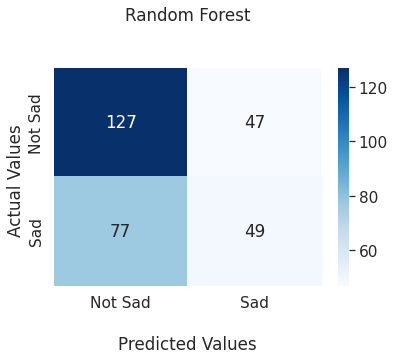

In [ ]:
# Training Random Forest and calculating its performance

text_clf_rf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-rm', RandomForestClassifier(n_estimators=10,criterion = 'entropy', random_state=0))])

text_clf_rf = text_clf_rf.fit(X_train, y_train)
y_pred = text_clf_rf.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

rf_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % rf_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()




[[129  45]
 [ 65  61]]


              precision    recall  f1-score   support

           0       0.66      0.74      0.70       174
           1       0.58      0.48      0.53       126

    accuracy                           0.63       300
   macro avg       0.62      0.61      0.61       300
weighted avg       0.63      0.63      0.63       300



Accuracy: 0.633333


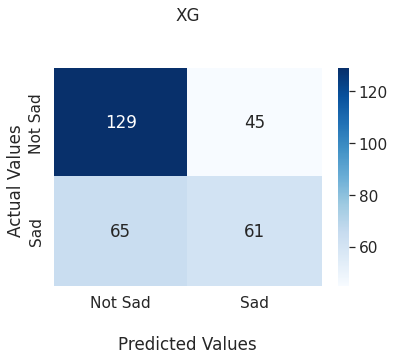

In [ ]:
# Training XGBoost and calculating its performance

text_clf_xgb = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-xgb', XGBClassifier())])

text_clf_xgb = text_clf_xgb.fit(X_train, y_train)
y_pred = text_clf_xgb.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

xgb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % xgb_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('XG\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



[[98 76]
 [54 72]]


              precision    recall  f1-score   support

           0       0.64      0.56      0.60       174
           1       0.49      0.57      0.53       126

    accuracy                           0.57       300
   macro avg       0.57      0.57      0.56       300
weighted avg       0.58      0.57      0.57       300



Accuracy: 0.566667


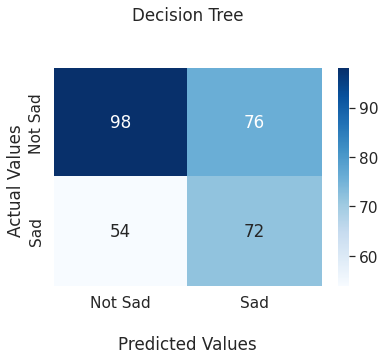

In [ ]:
# Training Decision Tree Classifier and calculating its performance

text_clf_dt = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-xgb', DecisionTreeClassifier(criterion = 'entropy', random_state = 0))])

text_clf_dt = text_clf_dt.fit(X_train, y_train)
y_pred = text_clf_dt.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

dt_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % dt_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



# **Model 4**
CountVectorizer, TfidfTransformer, bigram
No Stopword Remove and No Stemming

**Train Test Split**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(lyrics_dataset.cleaned,lyrics_dataset.label,train_size = 0.7,test_size = 0.3,random_state =0)

print(color.BOLD+"\nDataset Distribution:\n"+color.END)
print("\tSet Name","\t\tSize")
print("\t========\t\t======")

print("\tFull\t\t\t",len(lyrics_dataset),
"\n\tTraining\t\t",len(X_train),
"\n\tTest\t\t\t",len(X_test))


Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1000 
	Training		 700 
	Test			 300


[[169   5]
 [104  22]]


              precision    recall  f1-score   support

           0       0.62      0.97      0.76       174
           1       0.81      0.17      0.29       126

    accuracy                           0.64       300
   macro avg       0.72      0.57      0.52       300
weighted avg       0.70      0.64      0.56       300



Accuracy: 0.636667


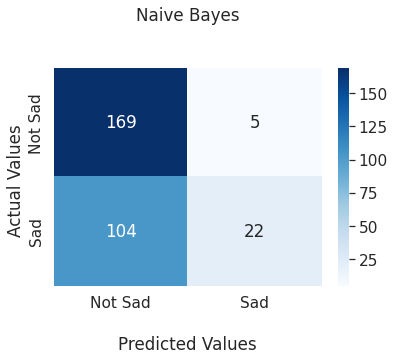

In [ ]:
# Extracting features from text files
# Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
# The names ‘vect’ , ‘tfidf’ and ‘clf’ are arbitrary but will be used later.
# We will be using the 'text_clf' going forward.
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(2,2), analyzer='char')), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

text_clf = text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

nb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % nb_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Naive Bayes\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()


[[129  45]
 [ 79  47]]


              precision    recall  f1-score   support

           0       0.62      0.74      0.68       174
           1       0.51      0.37      0.43       126

    accuracy                           0.59       300
   macro avg       0.57      0.56      0.55       300
weighted avg       0.57      0.59      0.57       300



Accuracy: 0.586667


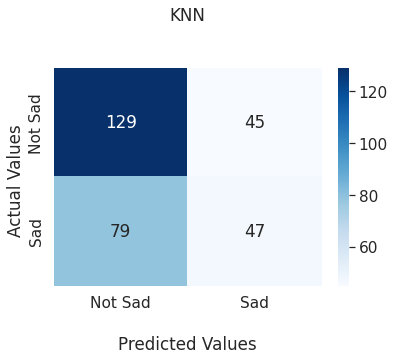

In [ ]:
# Training KNN and calculating its performance
from sklearn.neighbors import KNeighborsClassifier

text_clf_knn = Pipeline([('vect', CountVectorizer(ngram_range=(2,2), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-knn', KNeighborsClassifier(n_neighbors=2))])

text_clf_knn = text_clf_knn.fit(X_train, y_train)
y_pred = text_clf_knn.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

knn_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % knn_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('KNN\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


[[135  39]
 [ 50  76]]


              precision    recall  f1-score   support

           0       0.73      0.78      0.75       174
           1       0.66      0.60      0.63       126

    accuracy                           0.70       300
   macro avg       0.70      0.69      0.69       300
weighted avg       0.70      0.70      0.70       300



[[135  39]
 [ 50  76]]


              precision    recall  f1-score   support

           0       0.73      0.78      0.75       174
           1       0.66      0.60      0.63       126

    accuracy                           0.70       300
   macro avg       0.70      0.69      0.69       300
weighted avg       0.70      0.70      0.70       300



Accuracy: 0.703333


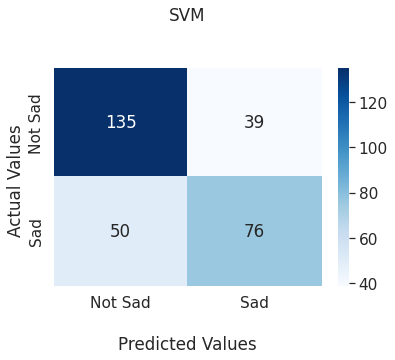

In [ ]:
# Training Support Vector Machines - SVM and calculating its performance

from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer(ngram_range=(2,2), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=5, random_state=42))])

text_clf_svm = text_clf_svm.fit(X_train, y_train)
y_pred = text_clf_svm.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

svm_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % svm_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('SVM\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()




[[145  29]
 [ 53  73]]


              precision    recall  f1-score   support

           0       0.73      0.83      0.78       174
           1       0.72      0.58      0.64       126

    accuracy                           0.73       300
   macro avg       0.72      0.71      0.71       300
weighted avg       0.73      0.73      0.72       300



Accuracy: 0.726667


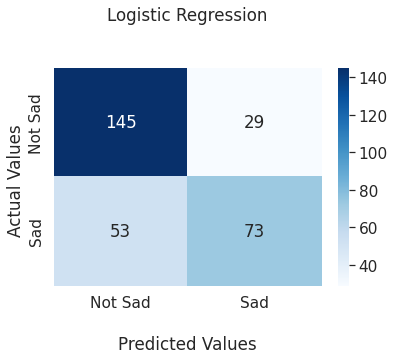

In [ ]:
# Training Logistic Regression and calculating its performance

text_clf_lr = Pipeline([('vect', CountVectorizer(ngram_range=(2,2), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-lr', LogisticRegression(solver='lbfgs', max_iter=1000))])

text_clf_lr = text_clf_lr.fit(X_train, y_train)
y_pred = text_clf_lr.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

lr_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % lr_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Logistic Regression\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



[[141  33]
 [ 74  52]]


              precision    recall  f1-score   support

           0       0.66      0.81      0.72       174
           1       0.61      0.41      0.49       126

    accuracy                           0.64       300
   macro avg       0.63      0.61      0.61       300
weighted avg       0.64      0.64      0.63       300



Accuracy: 0.643333


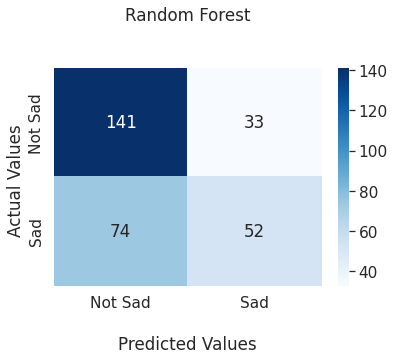

In [ ]:
# Training Random Forest and calculating its performance

text_clf_rf = Pipeline([('vect', CountVectorizer(ngram_range=(2,2), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-rm', RandomForestClassifier(n_estimators=10,criterion = 'entropy', random_state=0))])

text_clf_rf = text_clf_rf.fit(X_train, y_train)
y_pred = text_clf_rf.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

rf_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % rf_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()




[[126  48]
 [ 54  72]]


              precision    recall  f1-score   support

           0       0.70      0.72      0.71       174
           1       0.60      0.57      0.59       126

    accuracy                           0.66       300
   macro avg       0.65      0.65      0.65       300
weighted avg       0.66      0.66      0.66       300



Accuracy: 0.660000


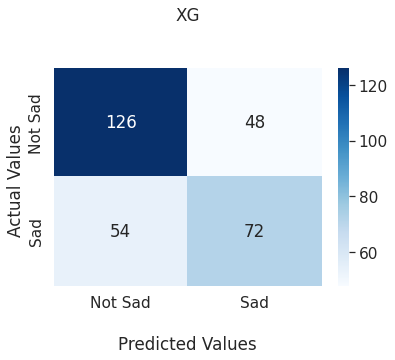

In [ ]:
# Training XGBoost and calculating its performance

text_clf_xgb = Pipeline([('vect', CountVectorizer(ngram_range=(2,2), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-xgb', XGBClassifier())])

text_clf_xgb = text_clf_xgb.fit(X_train, y_train)
y_pred = text_clf_xgb.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

xgb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % xgb_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('XG\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



[[107  67]
 [ 61  65]]


              precision    recall  f1-score   support

           0       0.64      0.61      0.63       174
           1       0.49      0.52      0.50       126

    accuracy                           0.57       300
   macro avg       0.56      0.57      0.56       300
weighted avg       0.58      0.57      0.57       300



Accuracy: 0.573333


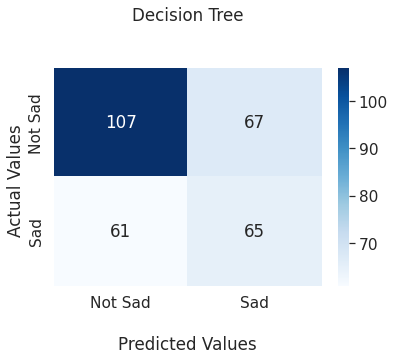

In [ ]:
# Training Decision Tree Classifier and calculating its performance

text_clf_dt = Pipeline([('vect', CountVectorizer(ngram_range=(2,2), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-xgb', DecisionTreeClassifier(criterion = 'entropy', random_state = 0))])

text_clf_dt = text_clf_dt.fit(X_train, y_train)
y_pred = text_clf_dt.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

dt_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % dt_accuracy)



ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



# **Model 5**
CountVectorizer, TfidfTransformer, bigram
Stopword Removing

**Train Test Split**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(lyrics_dataset.cleaned_stopwords,lyrics_dataset.label,train_size = 0.7,test_size = 0.3,random_state =0)

print(color.BOLD+"\nDataset Distribution:\n"+color.END)
print("\tSet Name","\t\tSize")
print("\t========\t\t======")

print("\tFull\t\t\t",len(lyrics_dataset),
"\n\tTraining\t\t",len(X_train),
"\n\tTest\t\t\t",len(X_test))


Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1000 
	Training		 700 
	Test			 300


[[165   9]
 [ 92  34]]


              precision    recall  f1-score   support

           0       0.64      0.95      0.77       174
           1       0.79      0.27      0.40       126

    accuracy                           0.66       300
   macro avg       0.72      0.61      0.58       300
weighted avg       0.70      0.66      0.61       300



Accuracy: 0.663333


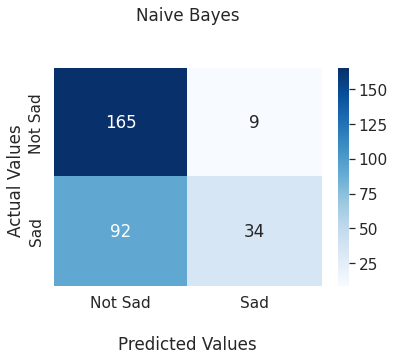

In [ ]:
# Extracting features from text files
# Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
# The names ‘vect’ , ‘tfidf’ and ‘clf’ are arbitrary but will be used later.
# We will be using the 'text_clf' going forward.
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(2,2), analyzer='char')), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

text_clf = text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

nb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % nb_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Naive Bayes\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()


[[131  43]
 [ 84  42]]


              precision    recall  f1-score   support

           0       0.61      0.75      0.67       174
           1       0.49      0.33      0.40       126

    accuracy                           0.58       300
   macro avg       0.55      0.54      0.54       300
weighted avg       0.56      0.58      0.56       300



Accuracy: 0.576667


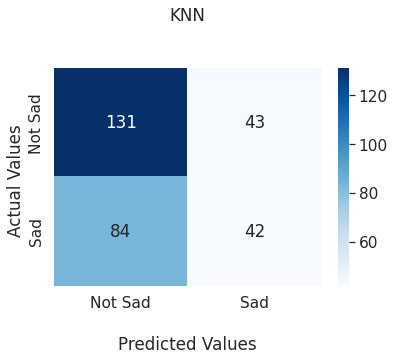

In [ ]:
# Training KNN and calculating its performance
from sklearn.neighbors import KNeighborsClassifier

text_clf_knn = Pipeline([('vect', CountVectorizer(ngram_range=(2,2), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-knn', KNeighborsClassifier(n_neighbors=2))])

text_clf_knn = text_clf_knn.fit(X_train, y_train)
y_pred = text_clf_knn.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

knn_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % knn_accuracy)



ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('KNN\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


[[135  39]
 [ 58  68]]


              precision    recall  f1-score   support

           0       0.70      0.78      0.74       174
           1       0.64      0.54      0.58       126

    accuracy                           0.68       300
   macro avg       0.67      0.66      0.66       300
weighted avg       0.67      0.68      0.67       300



[[135  39]
 [ 58  68]]


              precision    recall  f1-score   support

           0       0.70      0.78      0.74       174
           1       0.64      0.54      0.58       126

    accuracy                           0.68       300
   macro avg       0.67      0.66      0.66       300
weighted avg       0.67      0.68      0.67       300



Accuracy: 0.676667


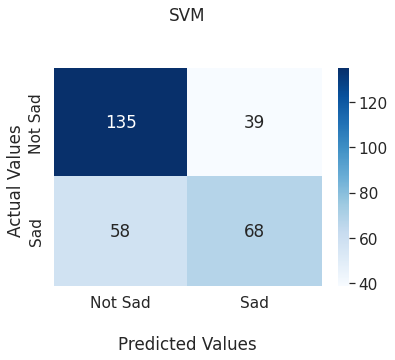

In [ ]:
# Training Support Vector Machines - SVM and calculating its performance

from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer(ngram_range=(2,2), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=5, random_state=42))])

text_clf_svm = text_clf_svm.fit(X_train, y_train)
y_pred = text_clf_svm.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

svm_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % svm_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('SVM\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()




[[138  36]
 [ 56  70]]


              precision    recall  f1-score   support

           0       0.71      0.79      0.75       174
           1       0.66      0.56      0.60       126

    accuracy                           0.69       300
   macro avg       0.69      0.67      0.68       300
weighted avg       0.69      0.69      0.69       300



Accuracy: 0.693333


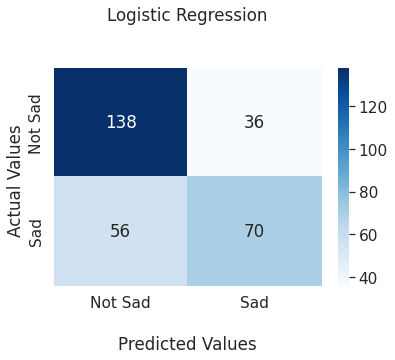

In [ ]:
# Training Logistic Regression and calculating its performance

text_clf_lr = Pipeline([('vect', CountVectorizer(ngram_range=(2,2), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-lr', LogisticRegression(solver='lbfgs', max_iter=1000))])

text_clf_lr = text_clf_lr.fit(X_train, y_train)
y_pred = text_clf_lr.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

lr_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % lr_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Logistic Regression\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



[[133  41]
 [ 73  53]]


              precision    recall  f1-score   support

           0       0.65      0.76      0.70       174
           1       0.56      0.42      0.48       126

    accuracy                           0.62       300
   macro avg       0.60      0.59      0.59       300
weighted avg       0.61      0.62      0.61       300



Accuracy: 0.620000


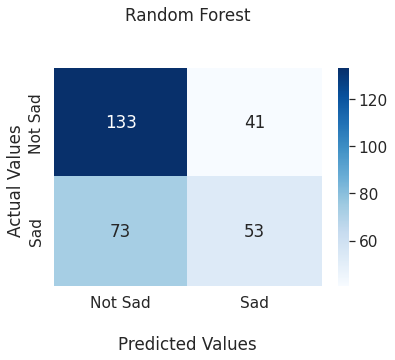

In [ ]:
# Training Random Forest and calculating its performance

text_clf_rf = Pipeline([('vect', CountVectorizer(ngram_range=(2,2), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-rm', RandomForestClassifier(n_estimators=10,criterion = 'entropy', random_state=0))])

text_clf_rf = text_clf_rf.fit(X_train, y_train)
y_pred = text_clf_rf.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

rf_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % rf_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()




[[119  55]
 [ 60  66]]


              precision    recall  f1-score   support

           0       0.66      0.68      0.67       174
           1       0.55      0.52      0.53       126

    accuracy                           0.62       300
   macro avg       0.61      0.60      0.60       300
weighted avg       0.61      0.62      0.62       300



Accuracy: 0.616667


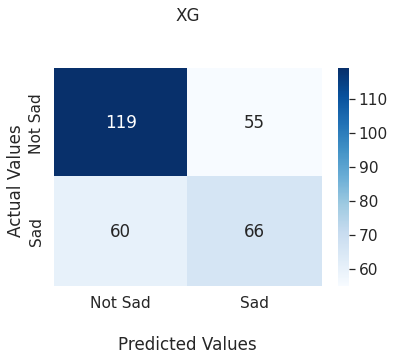

In [ ]:
# Training XGBoost and calculating its performance

text_clf_xgb = Pipeline([('vect', CountVectorizer(ngram_range=(2,2), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-xgb', XGBClassifier())])

text_clf_xgb = text_clf_xgb.fit(X_train, y_train)
y_pred = text_clf_xgb.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

xgb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % xgb_accuracy)



ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('XG\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



[[107  67]
 [ 61  65]]


              precision    recall  f1-score   support

           0       0.64      0.61      0.63       174
           1       0.49      0.52      0.50       126

    accuracy                           0.57       300
   macro avg       0.56      0.57      0.56       300
weighted avg       0.58      0.57      0.57       300



Accuracy: 0.573333


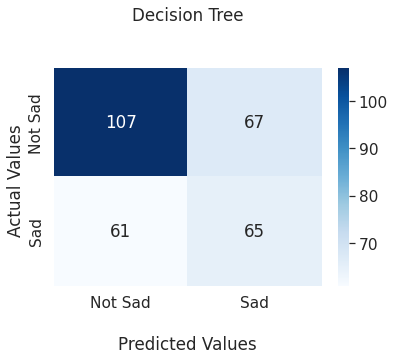

In [ ]:
# Training Decision Tree Classifier and calculating its performance

text_clf_dt = Pipeline([('vect', CountVectorizer(ngram_range=(2,2), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-xgb', DecisionTreeClassifier(criterion = 'entropy', random_state = 0))])

text_clf_dt = text_clf_dt.fit(X_train, y_train)
y_pred = text_clf_dt.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

dt_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % dt_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



# **Model 6**
CountVectorizer, TfidfTransformer, bigram
With Stemming

**Train Test Split**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(lyrics_dataset.cleaned_stem,lyrics_dataset.label,train_size = 0.7,test_size = 0.3,random_state =0)

print(color.BOLD+"\nDataset Distribution:\n"+color.END)
print("\tSet Name","\t\tSize")
print("\t========\t\t======")

print("\tFull\t\t\t",len(lyrics_dataset),
"\n\tTraining\t\t",len(X_train),
"\n\tTest\t\t\t",len(X_test))


Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1000 
	Training		 700 
	Test			 300


[[167   7]
 [ 93  33]]


              precision    recall  f1-score   support

           0       0.64      0.96      0.77       174
           1       0.82      0.26      0.40       126

    accuracy                           0.67       300
   macro avg       0.73      0.61      0.58       300
weighted avg       0.72      0.67      0.61       300



Accuracy: 0.666667


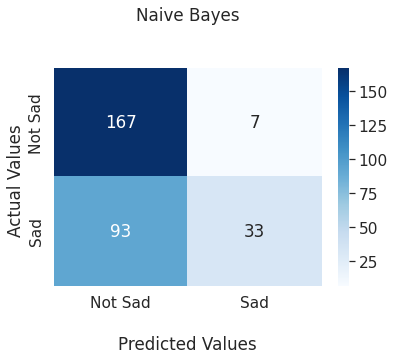

In [ ]:
# Extracting features from text files
# Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
# The names ‘vect’ , ‘tfidf’ and ‘clf’ are arbitrary but will be used later.
# We will be using the 'text_clf' going forward.
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(2,2), analyzer='char')), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

text_clf = text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

nb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % nb_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Naive Bayes\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()


[[129  45]
 [ 76  50]]


              precision    recall  f1-score   support

           0       0.63      0.74      0.68       174
           1       0.53      0.40      0.45       126

    accuracy                           0.60       300
   macro avg       0.58      0.57      0.57       300
weighted avg       0.59      0.60      0.58       300



Accuracy: 0.596667


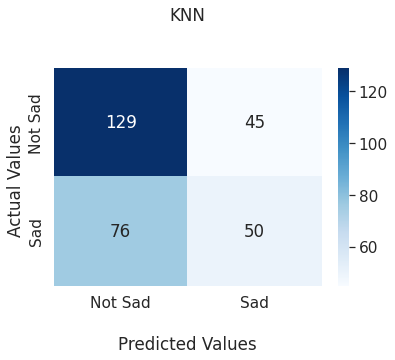

In [ ]:
# Training KNN and calculating its performance
from sklearn.neighbors import KNeighborsClassifier

text_clf_knn = Pipeline([('vect', CountVectorizer(ngram_range=(2,2), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-knn', KNeighborsClassifier(n_neighbors=2))])

text_clf_knn = text_clf_knn.fit(X_train, y_train)
y_pred = text_clf_knn.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

knn_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % knn_accuracy)



ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('KNN\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


[[127  47]
 [ 38  88]]


              precision    recall  f1-score   support

           0       0.77      0.73      0.75       174
           1       0.65      0.70      0.67       126

    accuracy                           0.72       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.72      0.72      0.72       300



[[127  47]
 [ 38  88]]


              precision    recall  f1-score   support

           0       0.77      0.73      0.75       174
           1       0.65      0.70      0.67       126

    accuracy                           0.72       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.72      0.72      0.72       300



Accuracy: 0.716667


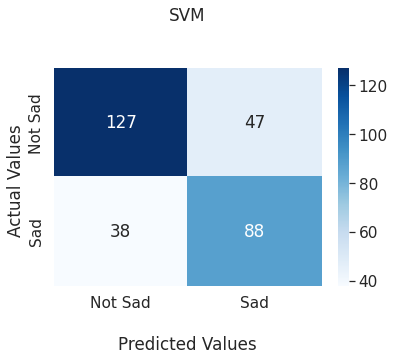

In [ ]:
# Training Support Vector Machines - SVM and calculating its performance

from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer(ngram_range=(2,2), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=5, random_state=42))])

text_clf_svm = text_clf_svm.fit(X_train, y_train)
y_pred = text_clf_svm.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

svm_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % svm_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('SVM\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()




[[141  33]
 [ 49  77]]


              precision    recall  f1-score   support

           0       0.74      0.81      0.77       174
           1       0.70      0.61      0.65       126

    accuracy                           0.73       300
   macro avg       0.72      0.71      0.71       300
weighted avg       0.72      0.73      0.72       300



Accuracy: 0.726667


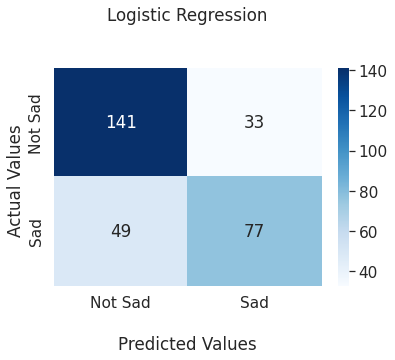

In [ ]:
# Training Logistic Regression and calculating its performance

text_clf_lr = Pipeline([('vect', CountVectorizer(ngram_range=(2,2), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-lr', LogisticRegression(solver='lbfgs', max_iter=1000))])

text_clf_lr = text_clf_lr.fit(X_train, y_train)
y_pred = text_clf_lr.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

lr_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % lr_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Logistic Regression\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



[[143  31]
 [ 71  55]]


              precision    recall  f1-score   support

           0       0.67      0.82      0.74       174
           1       0.64      0.44      0.52       126

    accuracy                           0.66       300
   macro avg       0.65      0.63      0.63       300
weighted avg       0.66      0.66      0.65       300



Accuracy: 0.660000


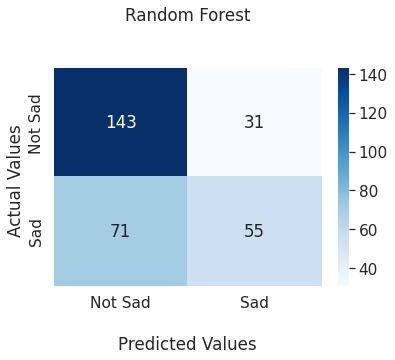

In [ ]:
# Training Random Forest and calculating its performance

text_clf_rf = Pipeline([('vect', CountVectorizer(ngram_range=(2,2), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-rm', RandomForestClassifier(n_estimators=10,criterion = 'entropy', random_state=0))])

text_clf_rf = text_clf_rf.fit(X_train, y_train)
y_pred = text_clf_rf.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

rf_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % rf_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()




[[122  52]
 [ 54  72]]


              precision    recall  f1-score   support

           0       0.69      0.70      0.70       174
           1       0.58      0.57      0.58       126

    accuracy                           0.65       300
   macro avg       0.64      0.64      0.64       300
weighted avg       0.65      0.65      0.65       300



Accuracy: 0.646667


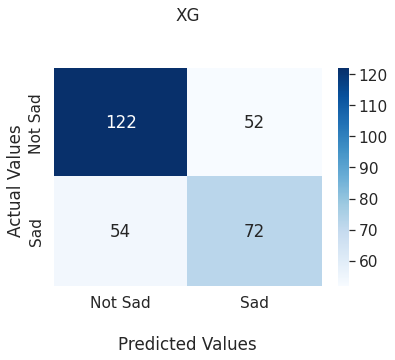

In [ ]:
# Training XGBoost and calculating its performance

text_clf_xgb = Pipeline([('vect', CountVectorizer(ngram_range=(2,2), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-xgb', XGBClassifier())])

text_clf_xgb = text_clf_xgb.fit(X_train, y_train)
y_pred = text_clf_xgb.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

xgb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % xgb_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('XG\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



[[103  71]
 [ 56  70]]


              precision    recall  f1-score   support

           0       0.65      0.59      0.62       174
           1       0.50      0.56      0.52       126

    accuracy                           0.58       300
   macro avg       0.57      0.57      0.57       300
weighted avg       0.58      0.58      0.58       300



Accuracy: 0.576667


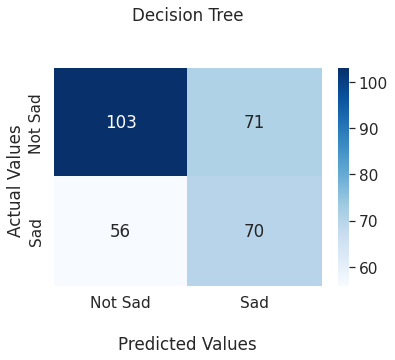

In [ ]:
# Training Decision Tree Classifier and calculating its performance

text_clf_dt = Pipeline([('vect', CountVectorizer(ngram_range=(2,2), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-xgb', DecisionTreeClassifier(criterion = 'entropy', random_state = 0))])

text_clf_dt = text_clf_dt.fit(X_train, y_train)
y_pred = text_clf_dt.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

dt_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % dt_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



# **Model 7**
CountVectorizer, TfidfTransformer, trigram
No Stopword Remove and No Stemming

**Train Test Split**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(lyrics_dataset.cleaned,lyrics_dataset.label,train_size = 0.7,test_size = 0.3,random_state =0)

print(color.BOLD+"\nDataset Distribution:\n"+color.END)
print("\tSet Name","\t\tSize")
print("\t========\t\t======")

print("\tFull\t\t\t",len(lyrics_dataset),
"\n\tTraining\t\t",len(X_train),
"\n\tTest\t\t\t",len(X_test))


Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1000 
	Training		 700 
	Test			 300


[[161  13]
 [ 84  42]]


              precision    recall  f1-score   support

           0       0.66      0.93      0.77       174
           1       0.76      0.33      0.46       126

    accuracy                           0.68       300
   macro avg       0.71      0.63      0.62       300
weighted avg       0.70      0.68      0.64       300



Accuracy: 0.676667


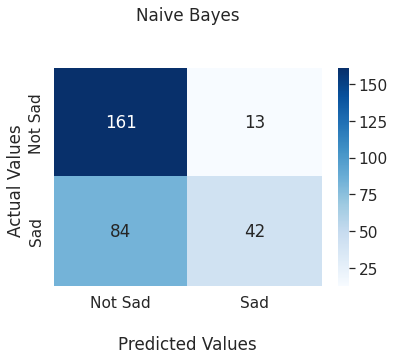

In [ ]:
# Extracting features from text files
# Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
# The names ‘vect’ , ‘tfidf’ and ‘clf’ are arbitrary but will be used later.
# We will be using the 'text_clf' going forward.
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(3,3), analyzer='char')), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

text_clf = text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

nb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % nb_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Naive Bayes\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()


[[139  35]
 [ 76  50]]


              precision    recall  f1-score   support

           0       0.65      0.80      0.71       174
           1       0.59      0.40      0.47       126

    accuracy                           0.63       300
   macro avg       0.62      0.60      0.59       300
weighted avg       0.62      0.63      0.61       300



Accuracy: 0.630000


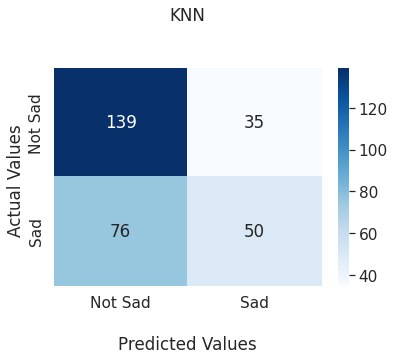

In [ ]:
# Training KNN and calculating its performance
from sklearn.neighbors import KNeighborsClassifier

text_clf_knn = Pipeline([('vect', CountVectorizer(ngram_range=(3,3), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-knn', KNeighborsClassifier(n_neighbors=2))])

text_clf_knn = text_clf_knn.fit(X_train, y_train)
y_pred = text_clf_knn.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

knn_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % knn_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('KNN\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


[[128  46]
 [ 39  87]]


              precision    recall  f1-score   support

           0       0.77      0.74      0.75       174
           1       0.65      0.69      0.67       126

    accuracy                           0.72       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.72      0.72      0.72       300



[[128  46]
 [ 39  87]]


              precision    recall  f1-score   support

           0       0.77      0.74      0.75       174
           1       0.65      0.69      0.67       126

    accuracy                           0.72       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.72      0.72      0.72       300



Accuracy: 0.716667


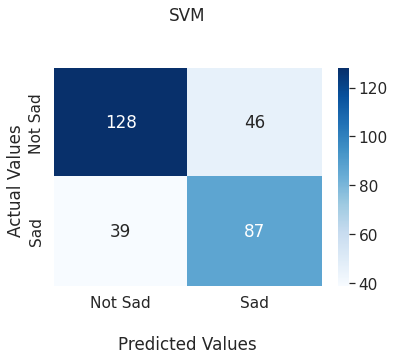

In [ ]:
# Training Support Vector Machines - SVM and calculating its performance

from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer(ngram_range=(3,3), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=5, random_state=42))])

text_clf_svm = text_clf_svm.fit(X_train, y_train)
y_pred = text_clf_svm.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

svm_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % svm_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('SVM\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()




[[146  28]
 [ 61  65]]


              precision    recall  f1-score   support

           0       0.71      0.84      0.77       174
           1       0.70      0.52      0.59       126

    accuracy                           0.70       300
   macro avg       0.70      0.68      0.68       300
weighted avg       0.70      0.70      0.69       300



Accuracy: 0.703333


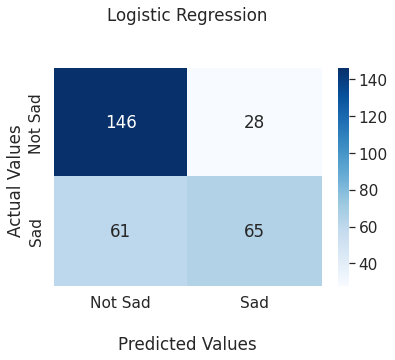

In [ ]:
# Training Logistic Regression and calculating its performance

text_clf_lr = Pipeline([('vect', CountVectorizer(ngram_range=(3,3), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-lr', LogisticRegression(solver='lbfgs', max_iter=1000))])

text_clf_lr = text_clf_lr.fit(X_train, y_train)
y_pred = text_clf_lr.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

lr_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % lr_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Logistic Regression\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



[[128  46]
 [ 74  52]]


              precision    recall  f1-score   support

           0       0.63      0.74      0.68       174
           1       0.53      0.41      0.46       126

    accuracy                           0.60       300
   macro avg       0.58      0.57      0.57       300
weighted avg       0.59      0.60      0.59       300



Accuracy: 0.600000


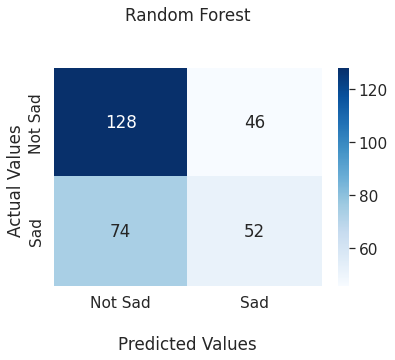

In [ ]:
# Training Random Forest and calculating its performance

text_clf_rf = Pipeline([('vect', CountVectorizer(ngram_range=(3,3), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-rm', RandomForestClassifier(n_estimators=10,criterion = 'entropy', random_state=0))])

text_clf_rf = text_clf_rf.fit(X_train, y_train)
y_pred = text_clf_rf.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

rf_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % rf_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()




[[130  44]
 [ 52  74]]


              precision    recall  f1-score   support

           0       0.71      0.75      0.73       174
           1       0.63      0.59      0.61       126

    accuracy                           0.68       300
   macro avg       0.67      0.67      0.67       300
weighted avg       0.68      0.68      0.68       300



Accuracy: 0.680000


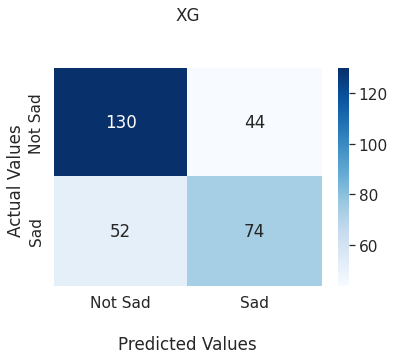

In [ ]:
# Training XGBoost and calculating its performance

text_clf_xgb = Pipeline([('vect', CountVectorizer(ngram_range=(3,3), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-xgb', XGBClassifier())])

text_clf_xgb = text_clf_xgb.fit(X_train, y_train)
y_pred = text_clf_xgb.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

xgb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % xgb_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('XG\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



[[110  64]
 [ 64  62]]


              precision    recall  f1-score   support

           0       0.63      0.63      0.63       174
           1       0.49      0.49      0.49       126

    accuracy                           0.57       300
   macro avg       0.56      0.56      0.56       300
weighted avg       0.57      0.57      0.57       300



Accuracy: 0.573333


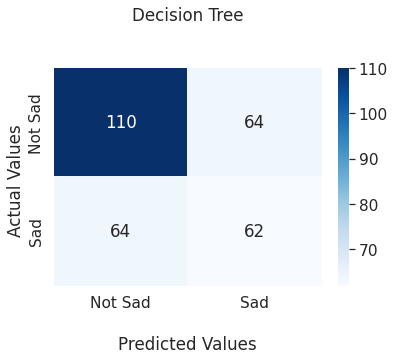

In [ ]:
# Training Decision Tree Classifier and calculating its performance

text_clf_dt = Pipeline([('vect', CountVectorizer(ngram_range=(3,3), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-xgb', DecisionTreeClassifier(criterion = 'entropy', random_state = 0))])

text_clf_dt = text_clf_dt.fit(X_train, y_train)
y_pred = text_clf_dt.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

dt_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % dt_accuracy)



ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



# **Model 8**
CountVectorizer, TfidfTransformer, trigram
Stopword Removing

**Train Test Split**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(lyrics_dataset.cleaned_stopwords,lyrics_dataset.label,train_size = 0.7,test_size = 0.3,random_state =0)

print(color.BOLD+"\nDataset Distribution:\n"+color.END)
print("\tSet Name","\t\tSize")
print("\t========\t\t======")

print("\tFull\t\t\t",len(lyrics_dataset),
"\n\tTraining\t\t",len(X_train),
"\n\tTest\t\t\t",len(X_test))


Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1000 
	Training		 700 
	Test			 300


[[161  13]
 [ 76  50]]


              precision    recall  f1-score   support

           0       0.68      0.93      0.78       174
           1       0.79      0.40      0.53       126

    accuracy                           0.70       300
   macro avg       0.74      0.66      0.66       300
weighted avg       0.73      0.70      0.68       300



Accuracy: 0.703333


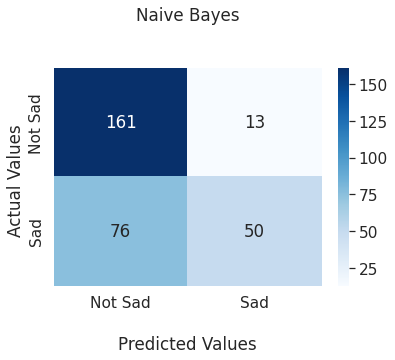

In [ ]:
# Extracting features from text files
# Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
# The names ‘vect’ , ‘tfidf’ and ‘clf’ are arbitrary but will be used later.
# We will be using the 'text_clf' going forward.
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(3,3), analyzer='char')), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

text_clf = text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

nb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % nb_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Naive Bayes\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()


[[140  34]
 [ 82  44]]


              precision    recall  f1-score   support

           0       0.63      0.80      0.71       174
           1       0.56      0.35      0.43       126

    accuracy                           0.61       300
   macro avg       0.60      0.58      0.57       300
weighted avg       0.60      0.61      0.59       300



Accuracy: 0.613333


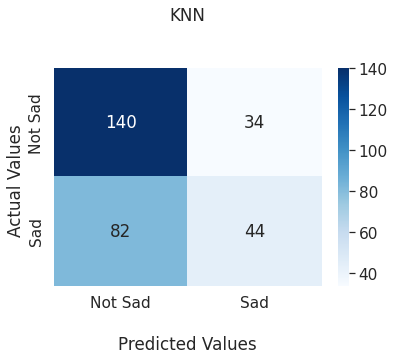

In [ ]:
# Training KNN and calculating its performance
from sklearn.neighbors import KNeighborsClassifier

text_clf_knn = Pipeline([('vect', CountVectorizer(ngram_range=(3,3), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-knn', KNeighborsClassifier(n_neighbors=2))])

text_clf_knn = text_clf_knn.fit(X_train, y_train)
y_pred = text_clf_knn.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

knn_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % knn_accuracy)



ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('KNN\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


[[127  47]
 [ 43  83]]


              precision    recall  f1-score   support

           0       0.75      0.73      0.74       174
           1       0.64      0.66      0.65       126

    accuracy                           0.70       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.70      0.70      0.70       300



[[127  47]
 [ 43  83]]


              precision    recall  f1-score   support

           0       0.75      0.73      0.74       174
           1       0.64      0.66      0.65       126

    accuracy                           0.70       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.70      0.70      0.70       300



Accuracy: 0.700000


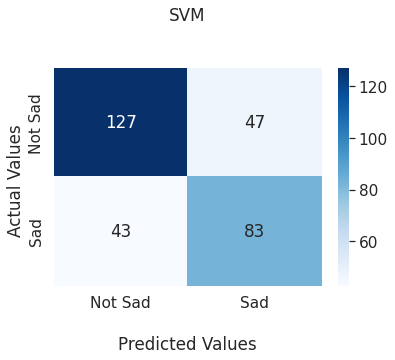

In [ ]:
# Training Support Vector Machines - SVM and calculating its performance

from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer(ngram_range=(3,3), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=5, random_state=42))])

text_clf_svm = text_clf_svm.fit(X_train, y_train)
y_pred = text_clf_svm.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

svm_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % svm_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('SVM\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()




[[146  28]
 [ 55  71]]


              precision    recall  f1-score   support

           0       0.73      0.84      0.78       174
           1       0.72      0.56      0.63       126

    accuracy                           0.72       300
   macro avg       0.72      0.70      0.70       300
weighted avg       0.72      0.72      0.72       300



Accuracy: 0.723333


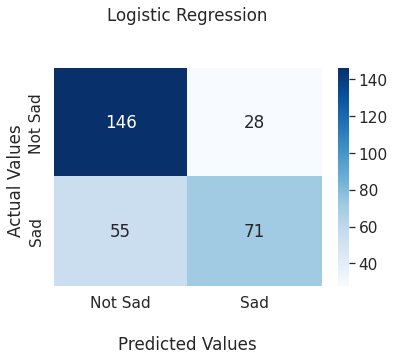

In [ ]:
# Training Logistic Regression and calculating its performance

text_clf_lr = Pipeline([('vect', CountVectorizer(ngram_range=(3,3), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-lr', LogisticRegression(solver='lbfgs', max_iter=1000))])

text_clf_lr = text_clf_lr.fit(X_train, y_train)
y_pred = text_clf_lr.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

lr_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % lr_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Logistic Regression\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



[[142  32]
 [ 66  60]]


              precision    recall  f1-score   support

           0       0.68      0.82      0.74       174
           1       0.65      0.48      0.55       126

    accuracy                           0.67       300
   macro avg       0.67      0.65      0.65       300
weighted avg       0.67      0.67      0.66       300



Accuracy: 0.673333


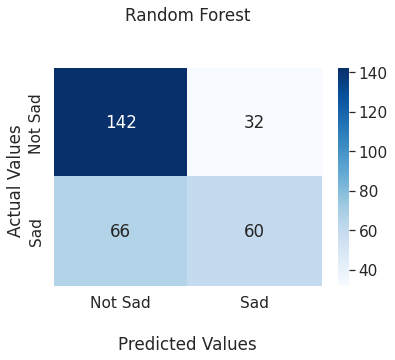

In [ ]:
# Training Random Forest and calculating its performance

text_clf_rf = Pipeline([('vect', CountVectorizer(ngram_range=(3,3), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-rm', RandomForestClassifier(n_estimators=10,criterion = 'entropy', random_state=0))])

text_clf_rf = text_clf_rf.fit(X_train, y_train)
y_pred = text_clf_rf.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

rf_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % rf_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()




[[131  43]
 [ 57  69]]


              precision    recall  f1-score   support

           0       0.70      0.75      0.72       174
           1       0.62      0.55      0.58       126

    accuracy                           0.67       300
   macro avg       0.66      0.65      0.65       300
weighted avg       0.66      0.67      0.66       300



Accuracy: 0.666667


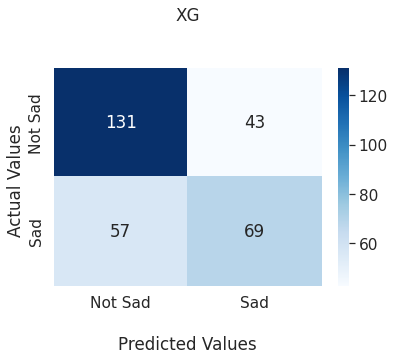

In [ ]:
# Training XGBoost and calculating its performance

text_clf_xgb = Pipeline([('vect', CountVectorizer(ngram_range=(3,3), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-xgb', XGBClassifier())])

text_clf_xgb = text_clf_xgb.fit(X_train, y_train)
y_pred = text_clf_xgb.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

xgb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % xgb_accuracy)



ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('XG\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



[[91 83]
 [52 74]]


              precision    recall  f1-score   support

           0       0.64      0.52      0.57       174
           1       0.47      0.59      0.52       126

    accuracy                           0.55       300
   macro avg       0.55      0.56      0.55       300
weighted avg       0.57      0.55      0.55       300



Accuracy: 0.550000


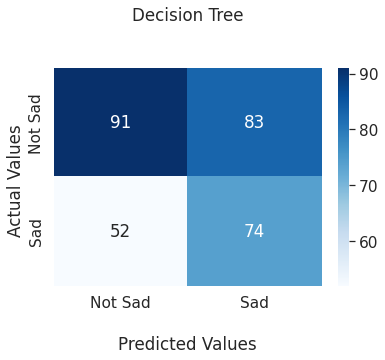

In [ ]:
# Training Decision Tree Classifier and calculating its performance

text_clf_dt = Pipeline([('vect', CountVectorizer(ngram_range=(3,3), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-xgb', DecisionTreeClassifier(criterion = 'entropy', random_state = 0))])

text_clf_dt = text_clf_dt.fit(X_train, y_train)
y_pred = text_clf_dt.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

dt_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % dt_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



# **Model 9**
CountVectorizer, TfidfTransformer, trigram
With Stemming

**Train Test Split**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(lyrics_dataset.cleaned_stem,lyrics_dataset.label,train_size = 0.7,test_size = 0.3,random_state =0)

print(color.BOLD+"\nDataset Distribution:\n"+color.END)
print("\tSet Name","\t\tSize")
print("\t========\t\t======")

print("\tFull\t\t\t",len(lyrics_dataset),
"\n\tTraining\t\t",len(X_train),
"\n\tTest\t\t\t",len(X_test))


Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1000 
	Training		 700 
	Test			 300


[[167   7]
 [ 93  33]]


              precision    recall  f1-score   support

           0       0.64      0.96      0.77       174
           1       0.82      0.26      0.40       126

    accuracy                           0.67       300
   macro avg       0.73      0.61      0.58       300
weighted avg       0.72      0.67      0.61       300



Accuracy: 0.666667


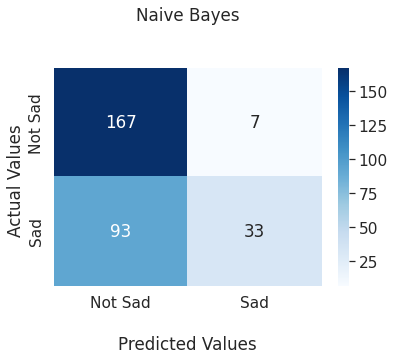

In [ ]:
# Extracting features from text files
# Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
# The names ‘vect’ , ‘tfidf’ and ‘clf’ are arbitrary but will be used later.
# We will be using the 'text_clf' going forward.
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(2,2), analyzer='char')), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

text_clf = text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

nb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % nb_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Naive Bayes\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()


[[134  40]
 [ 75  51]]


              precision    recall  f1-score   support

           0       0.64      0.77      0.70       174
           1       0.56      0.40      0.47       126

    accuracy                           0.62       300
   macro avg       0.60      0.59      0.58       300
weighted avg       0.61      0.62      0.60       300



Accuracy: 0.616667


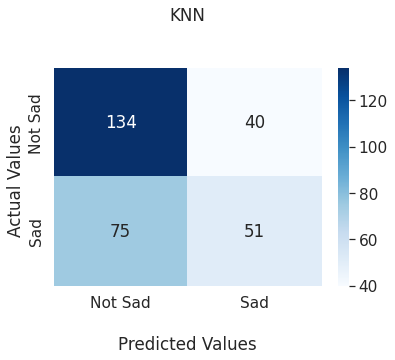

In [ ]:
# Training KNN and calculating its performance
from sklearn.neighbors import KNeighborsClassifier

text_clf_knn = Pipeline([('vect', CountVectorizer(ngram_range=(3,3), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-knn', KNeighborsClassifier(n_neighbors=2))])

text_clf_knn = text_clf_knn.fit(X_train, y_train)
y_pred = text_clf_knn.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

knn_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % knn_accuracy)



ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('KNN\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


[[129  45]
 [ 37  89]]


              precision    recall  f1-score   support

           0       0.78      0.74      0.76       174
           1       0.66      0.71      0.68       126

    accuracy                           0.73       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.73      0.73      0.73       300



[[129  45]
 [ 37  89]]


              precision    recall  f1-score   support

           0       0.78      0.74      0.76       174
           1       0.66      0.71      0.68       126

    accuracy                           0.73       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.73      0.73      0.73       300



Accuracy: 0.726667


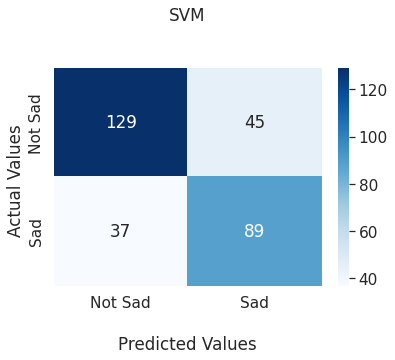

In [ ]:
# Training Support Vector Machines - SVM and calculating its performance

from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer(ngram_range=(3,3), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=5, random_state=42))])

text_clf_svm = text_clf_svm.fit(X_train, y_train)
y_pred = text_clf_svm.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

svm_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % svm_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('SVM\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()




[[148  26]
 [ 61  65]]


              precision    recall  f1-score   support

           0       0.71      0.85      0.77       174
           1       0.71      0.52      0.60       126

    accuracy                           0.71       300
   macro avg       0.71      0.68      0.69       300
weighted avg       0.71      0.71      0.70       300



Accuracy: 0.710000


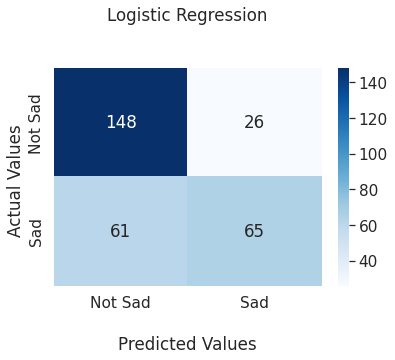

In [ ]:
# Training Logistic Regression and calculating its performance

text_clf_lr = Pipeline([('vect', CountVectorizer(ngram_range=(3,3), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-lr', LogisticRegression(solver='lbfgs', max_iter=1000))])

text_clf_lr = text_clf_lr.fit(X_train, y_train)
y_pred = text_clf_lr.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

lr_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % lr_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Logistic Regression\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



[[127  47]
 [ 67  59]]


              precision    recall  f1-score   support

           0       0.65      0.73      0.69       174
           1       0.56      0.47      0.51       126

    accuracy                           0.62       300
   macro avg       0.61      0.60      0.60       300
weighted avg       0.61      0.62      0.61       300



Accuracy: 0.620000


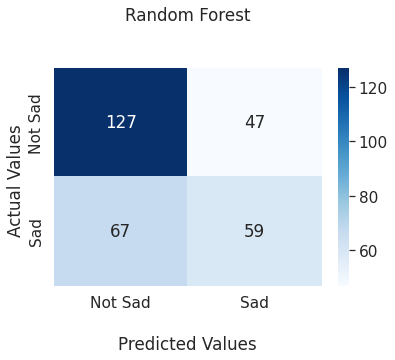

In [ ]:
# Training Random Forest and calculating its performance

text_clf_rf = Pipeline([('vect', CountVectorizer(ngram_range=(3,3), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-rm', RandomForestClassifier(n_estimators=10,criterion = 'entropy', random_state=0))])

text_clf_rf = text_clf_rf.fit(X_train, y_train)
y_pred = text_clf_rf.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

rf_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % rf_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()




[[127  47]
 [ 52  74]]


              precision    recall  f1-score   support

           0       0.71      0.73      0.72       174
           1       0.61      0.59      0.60       126

    accuracy                           0.67       300
   macro avg       0.66      0.66      0.66       300
weighted avg       0.67      0.67      0.67       300



Accuracy: 0.670000


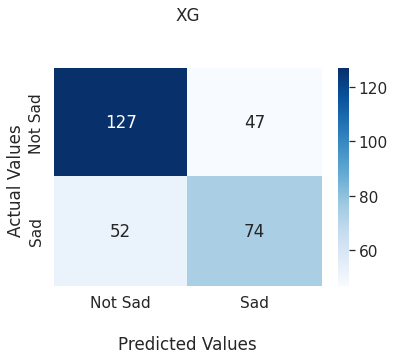

In [ ]:
# Training XGBoost and calculating its performance

text_clf_xgb = Pipeline([('vect', CountVectorizer(ngram_range=(3,3), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-xgb', XGBClassifier())])

text_clf_xgb = text_clf_xgb.fit(X_train, y_train)
y_pred = text_clf_xgb.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

xgb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % xgb_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('XG\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()



[[111  63]
 [ 66  60]]


              precision    recall  f1-score   support

           0       0.63      0.64      0.63       174
           1       0.49      0.48      0.48       126

    accuracy                           0.57       300
   macro avg       0.56      0.56      0.56       300
weighted avg       0.57      0.57      0.57       300



Accuracy: 0.570000


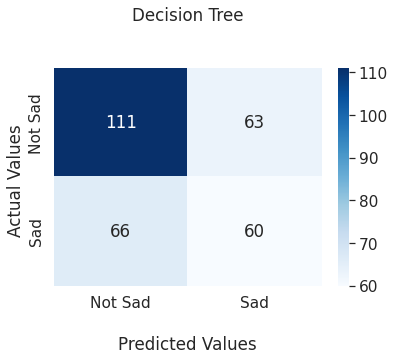

In [ ]:
# Training Decision Tree Classifier and calculating its performance

text_clf_dt = Pipeline([('vect', CountVectorizer(ngram_range=(3,3), analyzer='char')), ('tfidf', TfidfTransformer()),
                         ('clf-xgb', DecisionTreeClassifier(criterion = 'entropy', random_state = 0))])

text_clf_dt = text_clf_dt.fit(X_train, y_train)
y_pred = text_clf_dt.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

dt_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % dt_accuracy)


ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Sad','Sad'])
ax.yaxis.set_ticklabels(['Not Sad','Sad'])

## Display the visualization of the Confusion Matrix.
plt.show()

